# trim_extrema

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.filters.trim_extrema))

---
 ## Documentation for ``trim_extrema``
 ---
**<span style="color:purple">trim&#95;extrema</span>_(im, h, mode='maxima')_**


Trims local extrema in greyscale values by a specified amount.


This essentially decapitates peaks and/or floods valleys.

#### Parameters
* im : <b><i>ndarray</i></b>  The image whose extrema are to be removed
* h : <b><i>float</i></b>  The height to remove from each peak or fill in each valley
* mode : <b><i>string {'maxima' | 'minima' | 'extrema'}</i></b>  Specifies whether to remove maxima or minima or both

#### Returns
* image : <b><i>ndarray</i></b>  A copy of the input image with all the peaks and/or valleys
	removed.

#### Notes
This function is referred to as **imhmax** or **imhmin** in Matlab.
---

## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

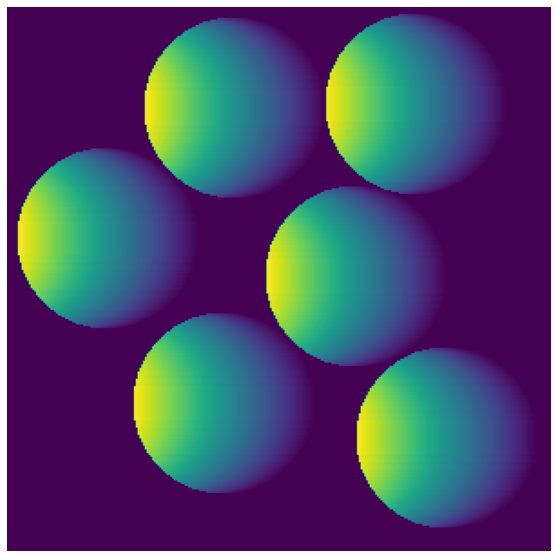

In [3]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=50, volume_fraction=0.9)
im = ps.filters.distance_transform_lin(im, axis = 1, mode = "reverse")
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)
h = 25

#default values:
mode="maxima"

## Apply filter function:
With different parameters

### h

Text(0.5, 1.0, 'h = 10')

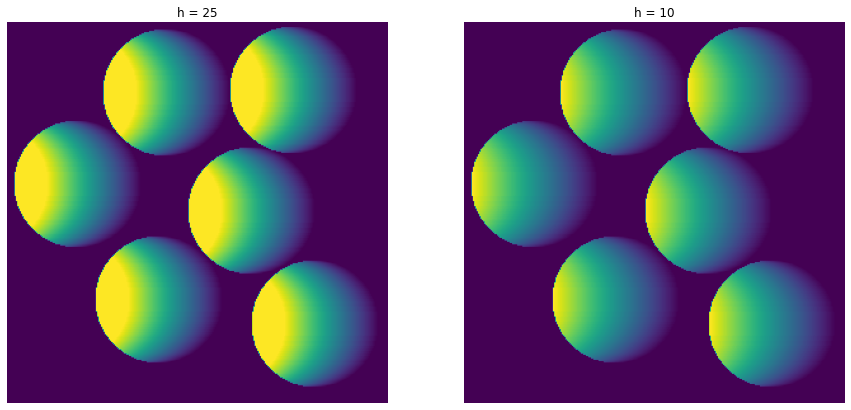

In [4]:
x = ps.filters.trim_extrema(im=im, h=h, mode=mode)
xx = ps.filters.trim_extrema(im=im, h=0, mode=mode)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('h = 25')
ax[1].set_title('h = 10')

### mode
options are maxima, minima, and extrema

Text(0.5, 1.0, 'mode = extrema')

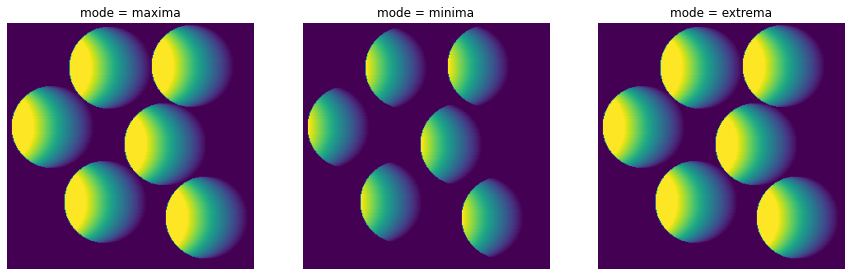

In [5]:
x = ps.filters.trim_extrema(im=im, h=h, mode= mode)
xx = ps.filters.trim_extrema(im=im, h=h, mode= 'minima')
xxx = ps.filters.trim_extrema(im=im, h=h, mode='extrema')

fig, ax = plt.subplots(1, 3, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[2].imshow(xxx);
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)
ax[0].set_title('mode = maxima')
ax[1].set_title('mode = minima')
ax[2].set_title('mode = extrema')

# Extrema mode seems to be functioning as only maxima, this change to code fixes it:

Text(0.5, 1.0, 'mode = extrema')

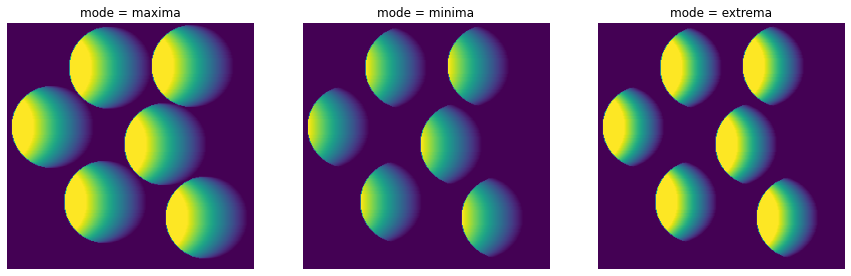

In [6]:
x = ps.filters.trim_extrema(im=im, h=h, mode= mode)
xx = ps.filters.trim_extrema(im=im, h=h, mode='minima')

from skimage.morphology import reconstruction
mode = "extrema"


#changes seed = im and mask = im to seed = result and mask = result
result = im
if mode in ["maxima", "extrema"]:
    result = reconstruction(seed=result - h, mask=result, method="dilation")
if mode in ["minima", "extrema"]:
    result = reconstruction(seed=result + h, mask=result, method="erosion")
   

xxx = result

fig, ax = plt.subplots(1, 3, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[2].imshow(result);
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)
ax[0].set_title('mode = maxima')
ax[1].set_title('mode = minima')
ax[2].set_title('mode = extrema')